## Example 1: Calculating the temperature distribution of a metal plate

### Theory

Suppose we have a two-dimensional rectangular plate that is subjected to certain boundary conditions, which can be seen from the figure below. Our target is to calculate the temperature distribution at each point. 

<div>
    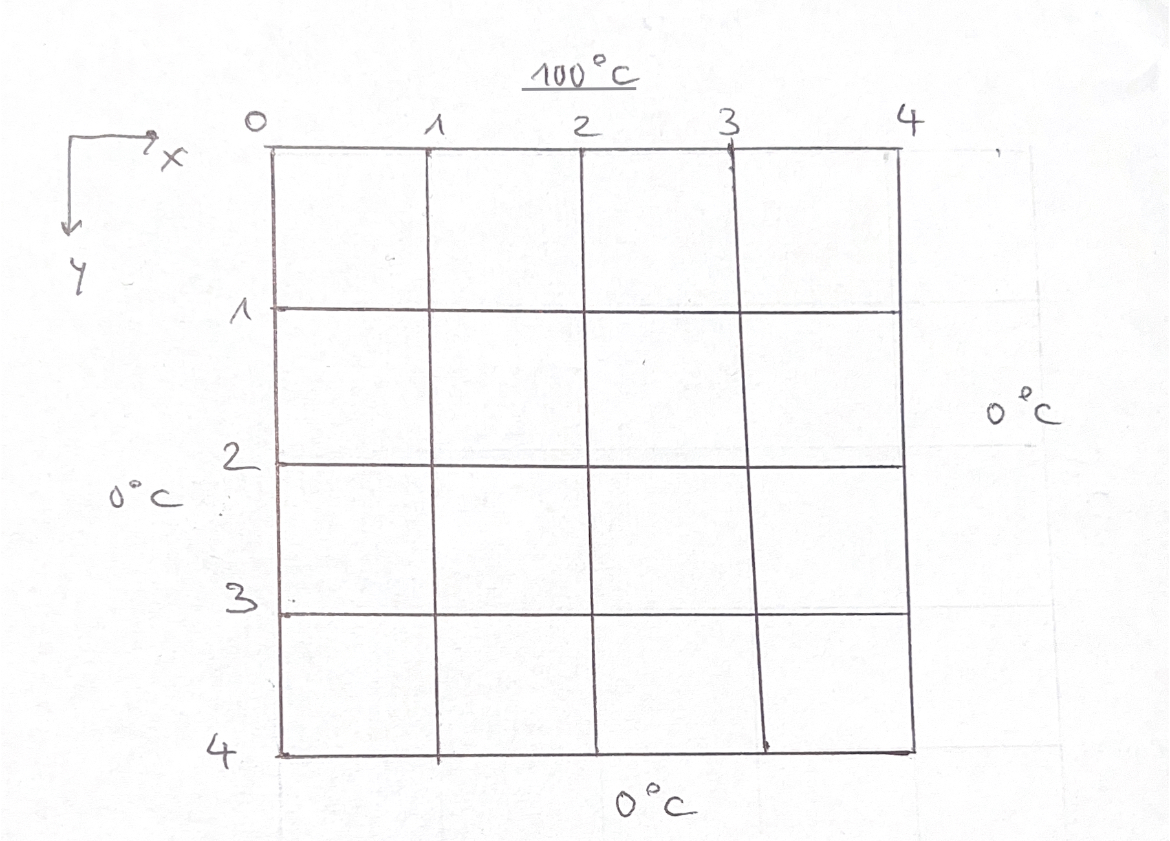
</div>

The way we will do that is to divide the plate in a lattice, and calculate the temperature at each point, using the Laplace equation and making use of the finite difference method and the Harrow-Hassidim-Lloyd (HHL) algorithm.

The <b>Laplace equation </b> for a steady bidimensional system is:
$$\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0 $$

We can use the finite difference method to derive another form of this equation for the nodal point $(i, j)$ on the lattice. 
$$\frac{\partial^2 T}{\partial x^2} \Biggr|_{(i, j)} = \frac{1}{\Delta x} \frac{(T_{i+1, j} - T_{i, j})-(T_{i, j} - T_{i-1, j})}{\Delta x}= \frac{T_{i+1, j} -2 T_{i, j} + T_{i-1, j}}{\Delta x^2}$$

And one can obtain an analogous expression for $y$. Next, we are going to define the lattice constant, $h = \Delta x = \Delta y$. Putting everything together, we obtain:

$$\frac{T_{i+1, j} -2 T_{i, j} + T_{i-1, j}}{h^2} + \frac{T_{i, j+1} -2 T_{i, j} + T_{i, j-1}}{h^2} = 0$$

$$ 4T_{i, j} - T_{i-1, j} - T_{i, j-1} - T_{i+1, j} - T_{i, j+1} = 0 $$

From the symmetry of the particular abovementioned system, we can exploit the symmetry to reduce the number of unknowns to only six (the points in the middle and one of the sides).

We end up with the following system of equations:
    $$ 4T_{1,1} - 0 -T_{1,2} - T_{2,1} - 100 = 0 $$
    $$ 3T_{2,1} - T_{1,1} - T_{2,2} - T_{1,1} - 100 = 0 $$
    $$ 4T_{1,2} - 0 - T_{1,3} - T_{2,2} - T_{1,1} = 0 $$
    $$ 3T_{2,2} - T_{2,3} - T_{1,2} - T_{2,1} = 0 $$
    $$ 4T_{1,3} - 0 - T_{1,4} - T_{2,3} - T_{1,2} = 0 $$
    $$ 3T_{2,3} - T_{1,3} - T_{2,4} - T_{2,2} = 0 $$
    $$ 4T_{1,4} - 0 - 0 - T_{1,3} - T_{2,4} = 0 $$
    $$ 4T_{1,4} - 0 - 0 - T_{1,3} - T_{2,4} = 0 $$

Which can be written in matrix form:
$$\begin{pmatrix}
4 & -1 & -1 & 0 & 0 & 0 & 0 & 0\\
-1 & 3 & 0 & -1 & 0 & 0 & 0 & 0 \\
-1 & 0 & 4 & -1 & -1 & 0 & 0 & 0 \\
0 & -1 & -1 & 3 & 0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 & 4 & -1 & -1 & 0 \\
0 & 0 & 0 & -1 & -1 & 3 & 0 & -1 \\
0 & 0 & 0 & 0 & -1 & 0 & 4 & -1 \\
0 & 0 & 0 & 0 & 0 & -1 & -1 & 3 \\
\end{pmatrix}
\begin{pmatrix}
T_{1,1} \\
T_{2,1} \\
T_{1,2} \\
T_{2,2} \\
T_{1,3} \\
T_{2,3} \\
T_{1,4} \\
T_{2,4}
\end{pmatrix}
=
\begin{pmatrix}
100 \\
100 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{pmatrix}
$$

### The HHL Algorithm

Now, we are ready to apply the HHL algorithm. What this algorithm does is, given a matrix $A$ and a vector $\vec{b}$, it finds a vector $\vec{x}$, such as $A\vec{x}=\vec{b}$. The matrix must be Hermitian so that it can be converted to an unitary operator. However, the algorithm can work with a non-Hermitian matrix too, by constructing an auxiliary matrix that satisfies this condition, like this:
$$ C =
\begin{pmatrix}
0  & A \\
A^\dag & 0
\end{pmatrix}
$$


Another condition that has to be imposed is that the matrix has a number of $N=2^n$ rows/columns. That is because we need a number of $n$ qubits to represent $N$ numbers. This can be engineered by choosing the lattice points accordingly.

The advantage of the algorithm is its speedup. A system of linear equations is called  $s$-sparse if it has at most $s$ non-zero entries per row or column. Solving an $s$-sparse system of size $N$ with a classical computer requires $\mathcal{O}(Nsk\log{1/\epsilon})$ running time using the conjugate gradient method, where $k$ denotes the condition number of the system and $\epsilon$ is the accuracy of the approximation. The HHL algorithm requires running time complexity $\mathcal{O}(s^2k^2/\epsilon\log{N})$.

In [26]:
# importing libraries
import qiskit
import numpy as np
from linear_solvers import NumPyLinearSolver, HHL

#constructing the matrix A and the vector b
matrix = np.array([[4, -1, -1, 0, 0, 0, 0, 0], [-1, 3, 0, -1, 0, 0, 0, 0], [-1, 0, 4, -1, -1, 0, 0, 0], [0, -1, -1, 3, 0, -1, 0, 0], [0, 0, -1, 0, 4, -1, -1, 0], [0, 0, 0, -1, -1, 3, 0, -1], [0, 0, 0, 0, -1, 0, 4, -1], [0, 0, 0, 0, 0, -1, -1, 3]])
vector = np.array([100, 100, 0, 0, 0, 0, 0, 0])

#defining the HHL solution and the classical solution (used for reference purposes)
naive_hhl_solution = HHL().solve(matrix, vector)
classical_solution = NumPyLinearSolver().solve(matrix,
                                               vector/np.linalg.norm(vector))

In [13]:
#calculating the solution using classical methods
print('classical state:', classical_solution.state)

classical state: [0.32141217 0.42051426 0.15802765 0.23302383 0.07767461 0.12052956
 0.03214122 0.05089026]


In [8]:
print('naive state:')
print(naive_hhl_solution.state)

naive state:
      ┌─────────────┐┌──────┐        ┌─────────┐
q4_0: ┤0            ├┤5     ├────────┤5        ├
      │             ││      │        │         │
q4_1: ┤1 circuit-96 ├┤6     ├────────┤6        ├
      │             ││      │        │         │
q4_2: ┤2            ├┤7     ├────────┤7        ├
      └─────────────┘│      │┌──────┐│         │
q5_0: ───────────────┤0     ├┤4     ├┤0        ├
                     │  QPE ││      ││  QPE_dg │
q5_1: ───────────────┤1     ├┤3     ├┤1        ├
                     │      ││      ││         │
q5_2: ───────────────┤2     ├┤2     ├┤2        ├
                     │      ││  1/x ││         │
q5_3: ───────────────┤3     ├┤1     ├┤3        ├
                     │      ││      ││         │
q5_4: ───────────────┤4     ├┤0     ├┤4        ├
                     └──────┘│      │└─────────┘
  q6: ───────────────────────┤5     ├───────────
                             └──────┘           


In [56]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)

classical Euclidean norm: 0.6193500362487158
naive Euclidean norm: 0.6254241275267816


In [54]:
from qiskit.quantum_info import Statevector

naive_sv = Statevector(naive_hhl_solution.state).data

# Extract vector components
naive_full_vector = np.array([naive_sv[0], naive_sv[1], naive_sv[2], naive_sv[3], naive_sv[4], naive_sv[5], naive_sv[6], naive_sv[7]])

print('naive raw solution vector:', naive_full_vector)

naive raw solution vector: [ 0.59637106+5.96566738e-14j  0.53617984+1.04241214e-13j
 -0.12709113-2.19903155e-14j -0.20205161-3.53421913e-14j
 -0.09608339-2.00372154e-14j -0.15492271-2.35554972e-14j
 -0.0462307 -3.16586557e-15j -0.07541418-6.21609726e-16j]


In [62]:
def get_solution_vector(solution):
    """Extracts and normalizes simulated state vector
    from LinearSolverResult."""
    solution_vector = Statevector(solution.state).data[0:8].real
    norm =  classical_solution.euclidean_norm
    return norm * solution_vector / naive_hhl_solution.euclidean_norm

print('full naive solution vector:', get_solution_vector(naive_hhl_solution))
print('classical state:', classical_solution.state)

full naive solution vector: [ 0.59057913  0.53097249 -0.12585682 -0.2000893  -0.09515023 -0.15341811
 -0.04578171 -0.07468176]
classical state: [0.32141217 0.42051426 0.15802765 0.23302383 0.07767461 0.12052956
 0.03214122 0.05089026]


Text(0, 0.5, 'value of temperature')

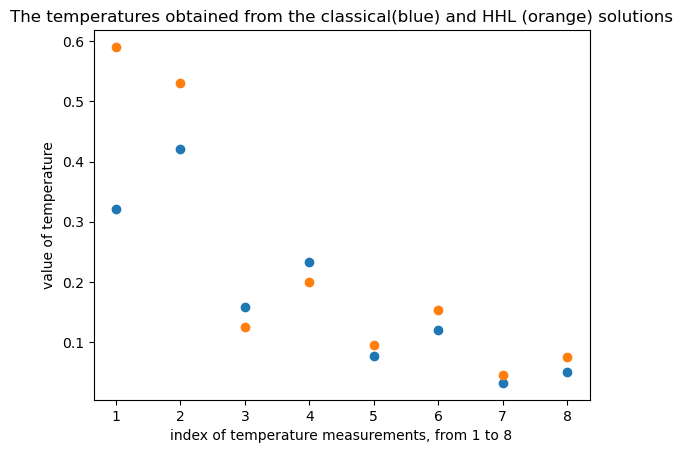

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x1  = [1, 2, 3, 4, 5, 6, 7, 8]
y1 = [0.32141217, 0.42051426, 0.15802765, 0.23302383, 0.07767461, 0.12052956, 0.03214122, 0.05089026]

x2  = [1, 2, 3, 4, 5, 6, 7, 8]
y2 =  [ 0.59057913,  0.53097249, 0.12585682, 0.2000893, 0.09515023, 0.15341811, 0.04578171, 0.07468176]

plt.scatter(x1, y1)

plt.scatter(x2, y2)

plt.title('The temperatures obtained from the classical(blue) and HHL (orange) solutions')
plt.xlabel('index of temperature measurements, from 1 to 8')
plt.ylabel('value of temperature')